### Testing selection procedure using HIV dataset

#### Import, data preprocessing and model training

In [3]:
from DeepPurpose import utils, dataset, CompoundPred
import warnings
warnings.filterwarnings("ignore")

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
X_drugs, y, drugs_index = dataset.load_HIV(path = './data')
drug_encoding = 'Morgan'

Dataset already downloaded in the local system...


In [2]:
import numpy as np
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt

In [78]:
n = len(y)
reind = np.random.permutation(n)
X_drugs_train = X_drugs[reind[0:int(n*0.4+1)]]
y_train = y[reind[0:int(n*0.4+1)]]
X_drugs_other = X_drugs[reind[int(1+n*0.4):n]]
y_other = y[reind[int(1+n*0.4):n]]

In [80]:
ttrain, tval, ttest = utils.data_process(X_drug = X_drugs_train, y = y_train, 
                                         drug_encoding = drug_encoding,
                                         split_method='random', frac=[0.7, 0.1, 0.2],
                                         random_seed = 42)

Drug Property Prediction Mode...
in total: 16451 drugs
encoding drug...
unique drugs: 16451


[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerat

Done.


[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerat

In [81]:
dother = utils.data_process(X_drug = X_drugs_other, y = y_other, 
                                     drug_encoding = drug_encoding,
                                     split_method= 'no_split',
                                     random_seed = 42)

Drug Property Prediction Mode...
in total: 24676 drugs
encoding drug...
unique drugs: 24676


[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerat

In [82]:
# USING CUSTOM PREDICTOR
ttrain_label = ttrain.Label.to_numpy()
# use np.stack to transform a 1d array of np arrays to a 2d np array
ttrain_predictor = np.stack(ttrain['drug_encoding'].to_numpy()) 
dother_predictor = np.stack(dother['drug_encoding'].to_numpy())

model = LinearRegression()
model.fit(ttrain_predictor, ttrain_label)
all_pred = model.predict(dother_predictor)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68897. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.73113 , AUPRC: 0.27094 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.14617. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.75720 , AUPRC: 0.34898 , F1: 0.34042
Training at Epoch 3 iteration 0 with loss 0.05871. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.80324 , AUPRC: 0.46003 , F1: 0.42424
--- Go for Testing ---
Testing AUROC: 0.7880622021813324 , AUPRC: 0.3931773271316014 , F1: 0.4161849710982659
--- Training Finished ---


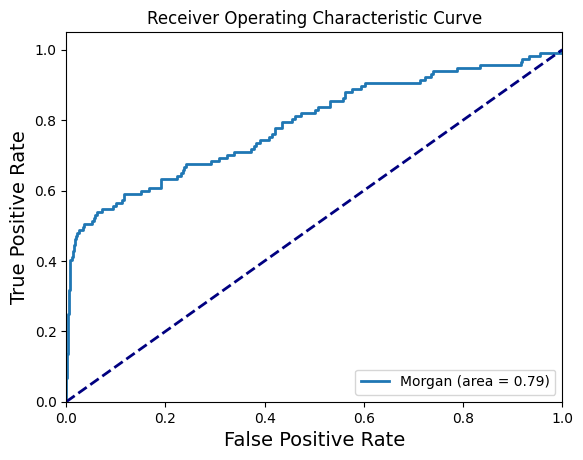

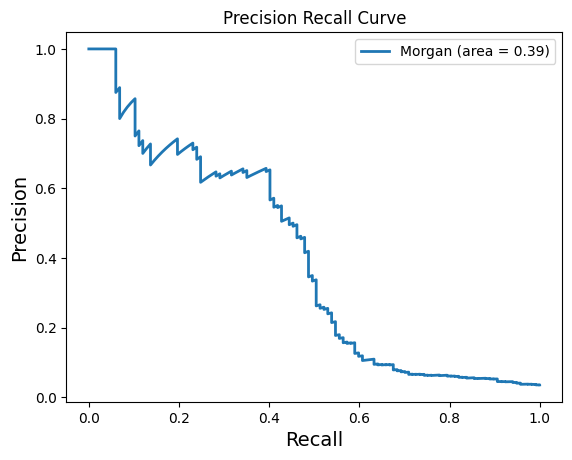

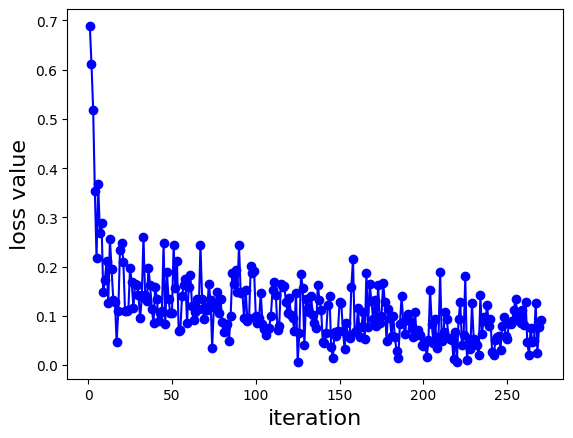

In [59]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                       cls_hidden_dims = [1024, 1024, 512], 
                       train_epoch = 3, 
                       LR = 0.001, 
                       batch_size = 128,
                       hidden_dim_drug = 128
                      )
model = CompoundPred.model_initialize(**config)
model.train(ttrain, tval, ttest)

all_pred = np.array(model.predict(dother))
train_pred = np.array(model.predict(ttrain))

#### Computing calibration set split (with covariate shift) and conformity scores

In [88]:
calib_msk = np.random.rand(len(dother)) < 0.5

dcalib = dother[calib_msk]
dtest = dother[~calib_msk]

hat_mu_calib = all_pred[calib_msk]
hat_mu_test = all_pred[~calib_msk]

y_calib = np.array(dcalib["Label"])
y_test = np.array(dtest["Label"])

In [89]:
c = 0
 
calib_scores_res = y_calib - hat_mu_calib
calib_scores_sub = - hat_mu_calib 
calib_scores_clip = 100 * (y_calib > c) + c * (y_calib <= c) - hat_mu_calib
 
test_scores = c - hat_mu_test

#### Calibration

In [90]:
q = 0.1 # nominal level

In [91]:
def conformal_select(calib_scores, test_scores, q = 0.1):
    ntest = len(test_scores)
    ncalib = len(calib_scores)
    pvals = np.zeros(ntest)
    
    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (ncalib+1)
         
    
    # BH(q) 
    df_test = pd.DataFrame({"id": range(ntest), "pval": pvals, "scores": test_scores}).sort_values(by='pval')
    
    df_test['threshold'] = q * np.linspace(1, ntest, num=ntest) / ntest 
    idx_smaller = [j for j in range(ntest) if df_test.iloc[j,1] <= df_test.iloc[j,3]]
     
    if len(idx_smaller) == 0:
        return np.array([]), pvals
    else:
        idx_sel = np.array(df_test.index[range(np.max(idx_smaller))])
        s_th = df_test.iloc[idx_smaller, 3]
        return idx_sel, pvals

In [92]:
def eval_sel(sel_idx, ys, cs):
    if len(sel_idx) == 0:
        fdp = 0
        power = 0
    else:
        fdp = np.sum(ys[sel_idx] <= cs[sel_idx]) / len(sel_idx)
        power = np.sum(ys[sel_idx] > cs[sel_idx]) / sum(ys > cs) 
    return fdp, power

In [109]:
BH_res, _ = conformal_select(calib_scores_res, test_scores, q)  
BH_sub, _ = conformal_select(calib_scores_sub[y_calib <= c], test_scores, q) 
BH_clip, _ = conformal_select(calib_scores_clip, test_scores, q)

In [110]:
BH_res_fdp, BH_res_power = eval_sel(BH_res, y_test, np.array([c]*len(y_test)))
BH_sub_fdp, BH_sub_power = eval_sel(BH_sub, y_test, np.array([c]*len(y_test)))
BH_clip_fdp, BH_clip_power = eval_sel(BH_clip, y_test, np.array([c]*len(y_test))) 

#### Result (above are outdated; see HIV.py)

In [55]:
linear = pd.read_csv("..\\csv-HIV\\linear\\itr=100.csv")
linear['regressor'] = 'linear'
linear = linear.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
linear

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,linear,0.1,0.085285,12339.0,12337.0,0.552417,0.835734,1475.84,0.003033,0.148833,1.63,0.072612,0.042925,21.16,0.073162,0.040022,19.7,0.073742,0.042454,21.04


In [56]:
mlp = pd.read_csv("..\\csv-HIV\\mlp\\hidden=32 layers=3 itr=100.csv")
mlp['regressor'] = 'mlp'
mlp = mlp.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
mlp

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,mlp,0.1,0.108252,12339.0,12337.0,0.534871,0.839133,1458.48,0.000751,0.103333,0.5,0.072806,0.009283,5.4,0.076958,0.008203,4.77,0.069592,0.008458,4.93


In [54]:
rf = pd.read_csv("..\\csv-HIV\\rf\\n_estim=50 max_depth=30 max_features=sqrt itr=100.csv")
rf['regressor'] = 'rf'
rf = rf.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
rf

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,rf,0.1,0.231637,12339.0,12337.0,0.594333,0.82631,1500.7,0.002788,0.060357,1.34,0.076038,0.050606,25.06,0.072245,0.048528,23.94,0.0793,0.049908,24.71


In [57]:
all = pd.concat((linear, rf, mlp))
all

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,linear,0.1,0.085285,12339.0,12337.0,0.552417,0.835734,1475.84,0.003033,0.148833,1.63,0.072612,0.042925,21.16,0.073162,0.040022,19.70,0.073742,0.042454,21.04
0,rf,0.1,0.231637,12339.0,12337.0,0.594333,0.826310,1500.70,0.002788,0.060357,1.34,0.076038,0.050606,25.06,0.072245,0.048528,23.94,0.079300,0.049908,24.71
0,mlp,0.1,0.108252,12339.0,12337.0,0.534871,0.839133,1458.48,0.000751,0.103333,0.50,0.072806,0.009283,5.40,0.076958,0.008203,4.77,0.069592,0.008458,4.93


C:\Users\Tian\AppData\Local\Temp\ipykernel_31784\3555870433.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


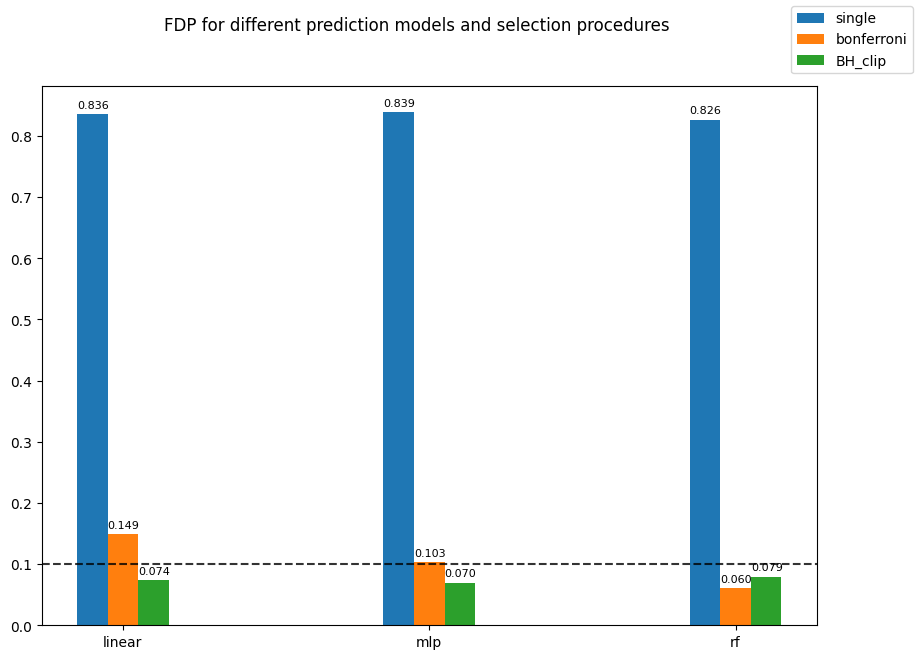

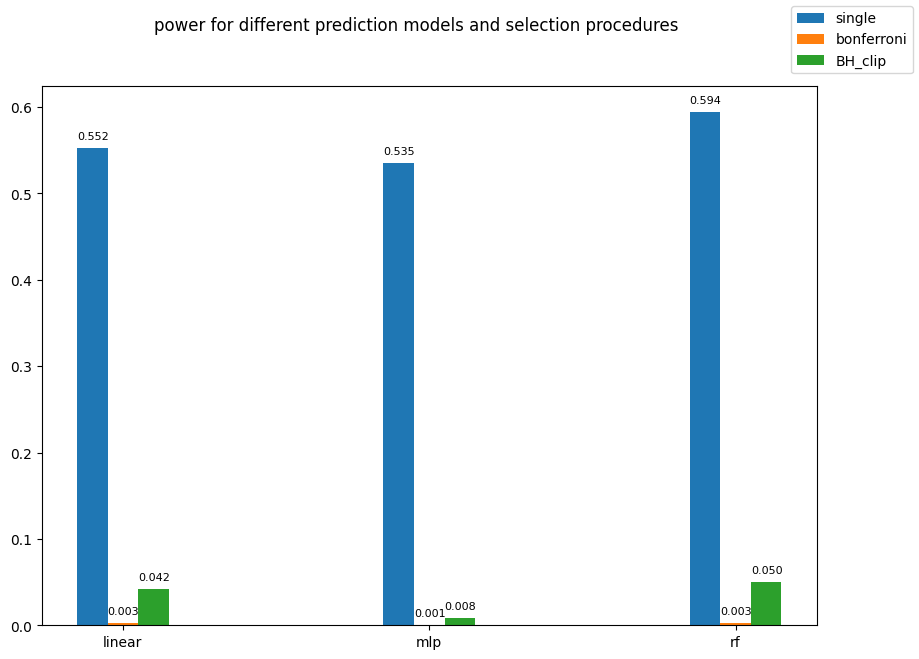

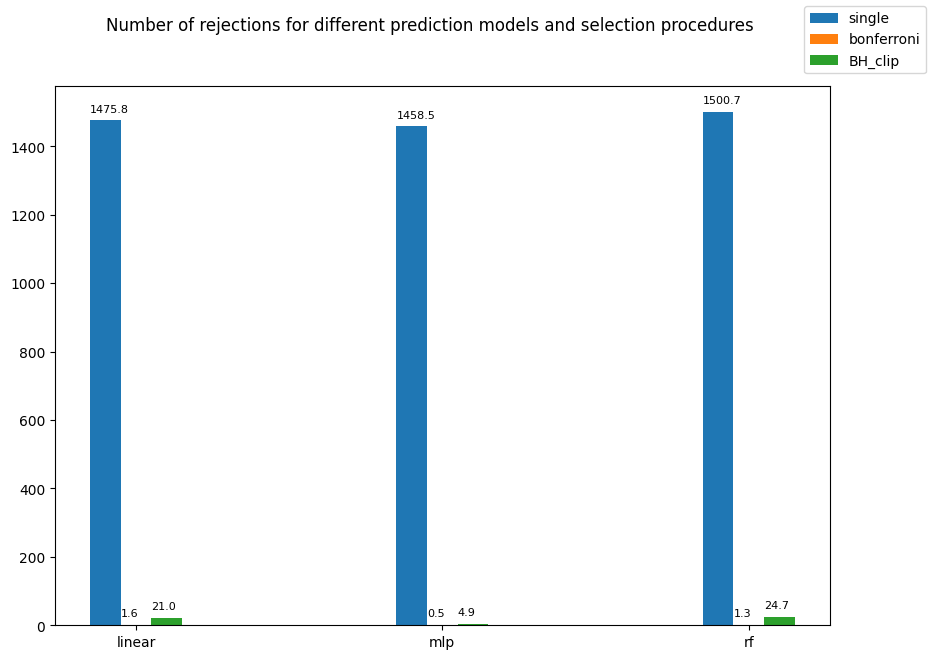

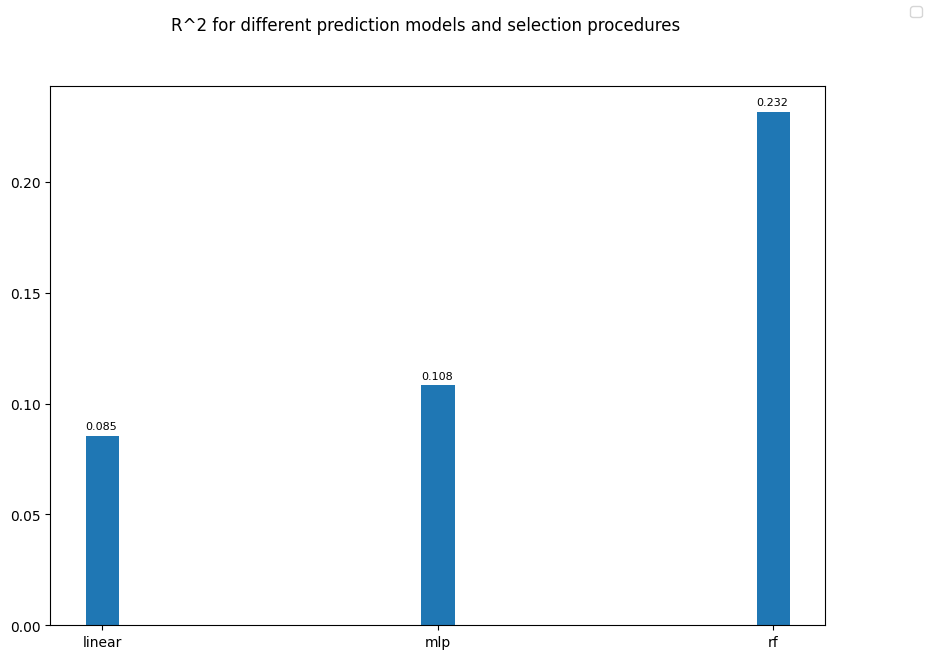

In [67]:
names = ['linear', 'mlp', 'rf']
targets = ['fdp', 'power', 'nsel', 'r_squared']
targets_name = ['FDP', 'power', 'Number of rejections', 'R^2']

for idx, target in enumerate(targets):
    fig, ax = plt.subplots(figsize=(10, 7))
    BH_res = []
    BH_sub = []
    BH_clip = []
    bonf = []
    single = []
    r_sq = []
    for reg in names:
        if target != 'r_squared':
            BH_res.append(all[all['regressor'] == reg][f"BH_res_{target}"].values[0])
            BH_sub.append(all[all['regressor'] == reg][f"BH_sub_{target}"].values[0])
            BH_clip.append(all[all['regressor'] == reg][f"BH_clip_{target}"].values[0])
            bonf.append(all[all['regressor'] == reg][f"bonf_{target}"].values[0])
            single.append(all[all['regressor'] == reg][f"single_{target}"].values[0])
        else:
            r_sq.append(all[all['regressor'] == reg]['r_squared'].values[0])
    if target != 'r_squared':
        ax.bar(np.arange(len(names)) - 0.1, single, 0.1, label='single')
        ax.bar(np.arange(len(names)), bonf, 0.1, label='bonferroni')
        ax.bar(np.arange(len(names)) + 0.1, BH_clip, 0.1, label='BH_clip')
    else:
        ax.bar(np.arange(len(names)), r_sq, 0.1)
    if target == 'fdp':
        ax.axhline(0.1, linestyle='--', alpha=0.8, color='black')

    rects = ax.patches
    labels = []
    if target != 'r_squared' and target != 'nsel':
        for i in range(len(single)):
            labels.append("%.3f" % single[i])
        for i in range(len(bonf)):
            labels.append("%.3f" % bonf[i])
        for i in range(len(BH_clip)):
            labels.append("%.3f" % BH_clip[i])
    elif target == 'r_squared':
        for i in range(len(r_sq)):
            labels.append("%.3f" % r_sq[i])
    else:
        for i in range(len(single)):
            labels.append("%.1f" % single[i])
        for i in range(len(bonf)):
            labels.append("%.1f" % bonf[i])
        for i in range(len(BH_clip)):
            labels.append("%.1f" % BH_clip[i])

    offset = 0.01
    if target == 'r_squared':
        offset = 0.003
    if target == 'nsel':
        offset = 25

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x(), height + offset, label, fontsize=8
        )
    ax.set_xticks(np.arange(len(names)), names)
    fig.suptitle(f"{targets_name[idx]} for different prediction models and selection procedures")
    fig.legend()